# Working on Health Insurance Premium data set.

Due to rapid growth of various health disorders , it's very important to have health insurances for allmost all the people.


*  Health insurance premium depends on the various factors in the real world
*  Estimating accurate Health insurance premium based on the peoples age, health conditions etc is very important to make it available to all the people.

Here in the give Dataset we have 1338 rows with 7 columns.
Having 3 categorical variables such as 
1. gender
2. smoking_status
3. location      
and 4 numerical variables such as 
1. age
2. BMI
3. Children
4. health_insurance_price






In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Neccesary libraries has been imported
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [5]:
insurance_df=pd.read_excel("/content/Health_insurance_cost.xlsx")

In [6]:
insurance_df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [7]:
# to get statistical information of the data set
insurance_df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_df.isnull().mean()*100

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

From we can observe that missing values are present in the data set, but as the percentage of missing values are less the 5% in the data set, hence we can remove those observations to get the accurate results

In [10]:
insurance_df.age.unique()

array([19., 18., 28., 33., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 34., 59., nan, 55., 22., 63., 26., 35., 24., 41.,
       38., 36., 21., 48., 40., 58., 53., 43., 64., 20., 61., 44., 57.,
       29., 45., 54., 49., 47., 51., 42., 50., 39.])

Unique values in **age** column

In [11]:
# drpped the missing observations
insurance_df.dropna(inplace=True)
insurance_df.reset_index(drop=True,inplace=True)

Missing observations has been dropped

In [12]:
insurance_df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,18.0,male,33.770,1.0,no,southeast,1725.55230
1,28.0,male,33.000,3.0,no,southeast,4449.46200
2,33.0,male,22.705,0.0,no,northwest,21984.47061
3,32.0,male,28.880,0.0,no,northwest,3866.85520
4,31.0,female,25.740,0.0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1280,50.0,male,30.970,3.0,no,northwest,10600.54830
1281,18.0,female,31.920,0.0,no,northeast,2205.98080
1282,18.0,female,36.850,0.0,no,southeast,1629.83350
1283,21.0,female,25.800,0.0,no,southwest,2007.94500


After dropping the missing observations we have 1285 rows and 7 variables

In [13]:
# checking for missing values
insurance_df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [14]:
insurance_df.Children.unique()

array([1., 3., 0., 2., 5., 4.])

There are 6 uniques values in Childdren variable such as 0 , 1,2,3,4,5

In [15]:
insurance_df.smoking_status.unique()

array(['no', 'yes'], dtype=object)

smokinng_status column has 2 unique values as **Yes** and **No**

In [16]:
insurance_df.location.unique()

array(['southeast', 'northwest', 'northeast', 'southwest'], dtype=object)

There are 4 unique variables in location column such as southeast , northwest,  northeast, southwest, 

In [17]:
# columns in dataset
columns=insurance_df.columns
columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [18]:
import seaborn as sns

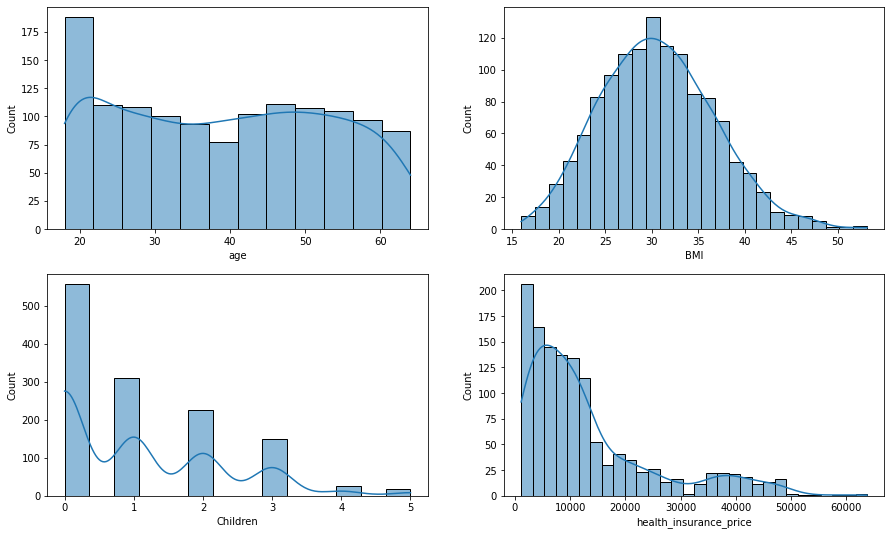

In [19]:
fig,ax=plt.subplots(2,2 , figsize=(15,9))
sns.histplot(data=insurance_df,x="age",kde=True,ax=ax[0,0])
sns.histplot(data=insurance_df, x='BMI',kde=True, ax=ax[0,1])
sns.histplot(data=insurance_df, x='Children',kde=True, ax=ax[1,0])
sns.histplot(data=insurance_df, x='health_insurance_price',kde=True,ax=ax[1,1])

From the above histogram plots we can observe that

*  For age distribution it seems almost the count of all the age group people are similar except for the age group of 20 - 25.
*  It seems the BMI is almost normally distributed 
*  In the given dataset it seems most the people are not having childrens and only only few people having 4 or 5 childrens.
*  We can observe that most of the people are having insurance prices less than 15000, and only few were having insurances prices more than 20000.

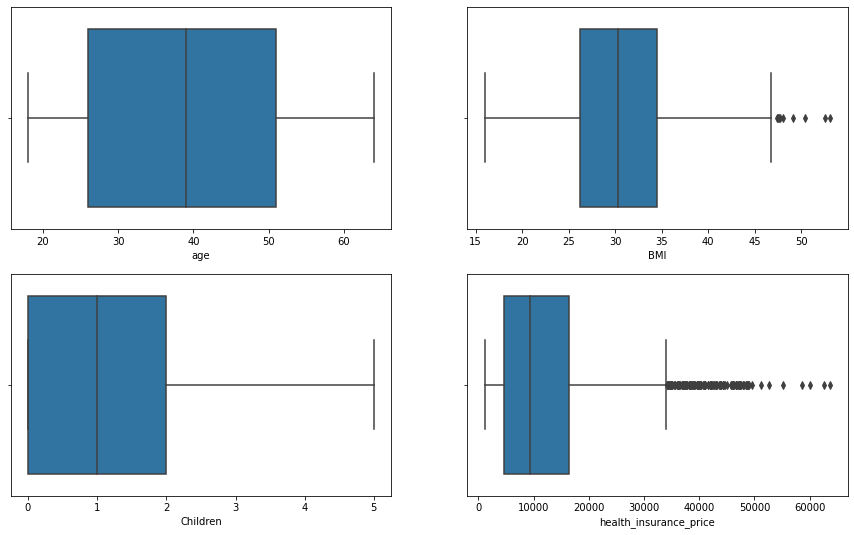

In [20]:
fig,ax=plt.subplots(2,2 , figsize=(15,9))
sns.boxplot(data=insurance_df,x="age",ax=ax[0,0])
sns.boxplot(data=insurance_df, x='BMI', ax=ax[0,1])
sns.boxplot(data=insurance_df, x='Children', ax=ax[1,0])
sns.boxplot(data=insurance_df, x='health_insurance_price', ax=ax[1,1])



We can found that

* NO Outliers are found in age column,
* And very few out liers were found in BMI distributions but that was due to varience not because of mistake,
* No Out liers found in children's column,
* found outliers in outcome variable health_insurance_price to get the correct predictions not touching the values in that column


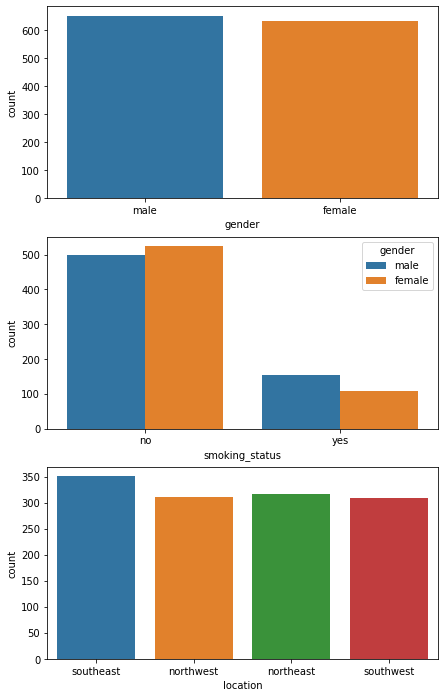

In [21]:
fig,ax = plt.subplots(3,figsize=(7,12))
sns.countplot(data=insurance_df,x="gender",ax=ax[0])
sns.countplot(data=insurance_df, x='smoking_status',hue="gender" ,ax=ax[1])
sns.countplot(data=insurance_df, x='location', ax=ax[2])


* The count of Male and Female are almost same in the given dataset
* smoking people are very few compared to non smoking people
* male smokers are slightly more than the female smokers
* the people from southeast are slightly more than the northwest, northeast,souteast


In [22]:
insurance_df.groupby("gender").mean()

,age,BMI,Children,health_insurance_price
gender,,,,
female,39.334913,30.364826,1.071090,12418.228797
male,38.987730,30.864348,1.101227,13912.912735


*  Average health insurance price for Male is more than female

In [23]:
insurance_df.groupby("smoking_status").mean()

,age,BMI,Children,health_insurance_price
smoking_status,,,,
no,39.273705,30.606075,1.082111,8356.606030
yes,38.709924,30.665935,1.103053,31996.755585


* Average health insurance price of smoking peaople is more than non-smoking people

In [24]:
insurance_df.groupby("location").mean()

,age,BMI,Children,health_insurance_price
location,,,,
northeast,39.110759,29.204684,1.050633,13408.266457
northwest,39.051613,29.144161,1.125806,12287.117606
southeast,38.877493,33.282678,1.028490,14440.934976
southwest,39.636364,30.515909,1.149351,12393.412652


* Averge health insurance price in southeast is slightly higher than other regions 

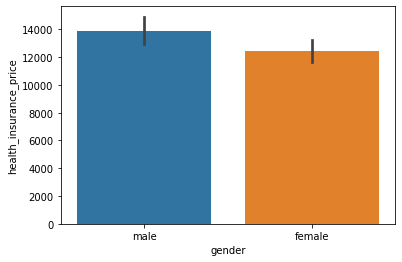

In [25]:
sns.barplot(data=insurance_df,x="gender",y="health_insurance_price")

* Males are having higher insurance price than Females

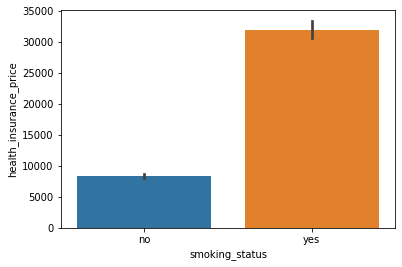

In [26]:
sns.barplot(data=insurance_df,x="smoking_status",y="health_insurance_price")

* Smoking people are having very high insurances than non-smoking

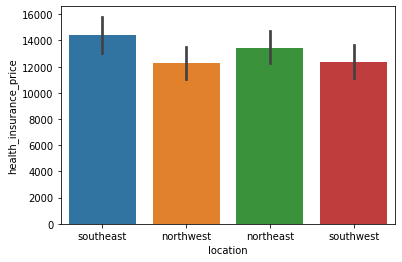

In [27]:
sns.barplot(data=insurance_df,x="location",y="health_insurance_price")

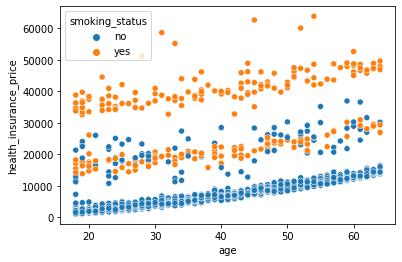

In [28]:
sns.scatterplot(x="age",y="health_insurance_price",hue="smoking_status",data=insurance_df)

Althogu at every age group we found different insurance prices, we can found 
* as age increasing the insurance prices for non- smoking people is slightly inscreasing
* but as age increases the insurance price for smoking people also increasing comparatively higher than the non-smoking people

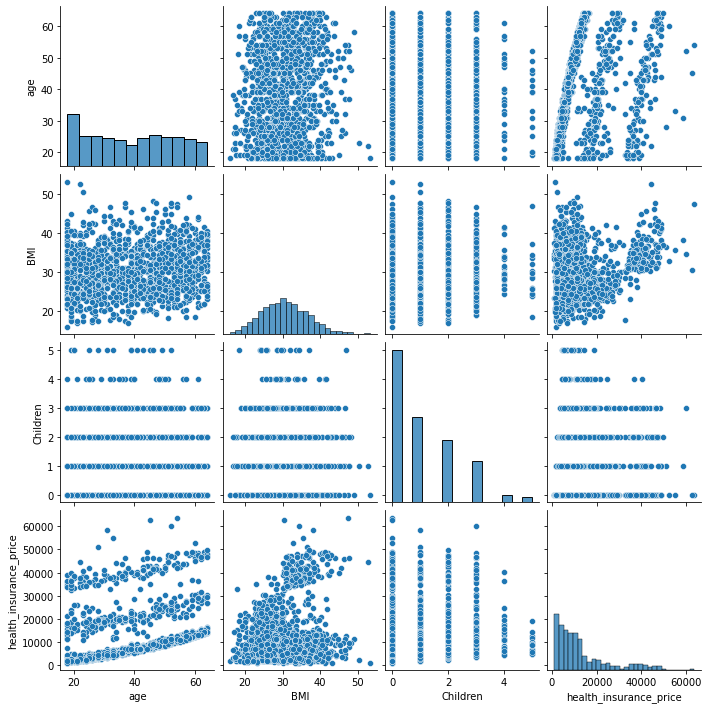

In [29]:
# pairplot of numerical variables
sns.pairplot(insurance_df[["age","BMI","Children","health_insurance_price"]])

we found that age & health insurance prices and BMI & health insurance prices  are some what positively related

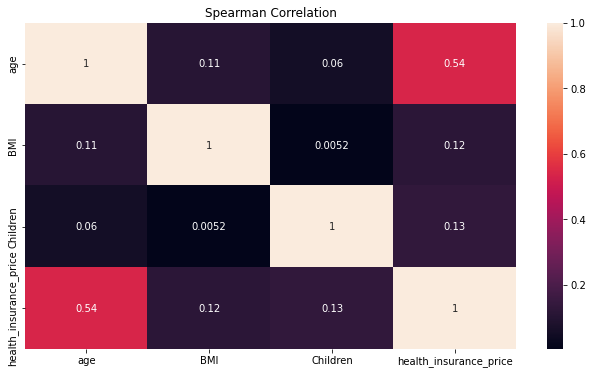

,age,BMI,Children,health_insurance_price
age,1.000000,0.109018,0.059523,0.540966
BMI,0.109018,1.000000,0.005182,0.118311
Children,0.059523,0.005182,1.000000,0.133586
health_insurance_price,0.540966,0.118311,0.133586,1.000000


In [30]:
plt.figure(figsize=(11,6))
corr =insurance_df.corr(method = "spearman")
sns.heatmap(corr, annot = True)
plt.title("Spearman Correlation")
plt.show()
corr

* We can observe that age and health insurance price are highly correlated

# Encoding categoricalvariables to numeric

In [31]:
# getting dummies for cateorical variables
df1=pd.get_dummies(data=insurance_df,drop_first=True)
df1

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,18.0,33.770,1.0,1725.55230,1,0,0,1,0
1,28.0,33.000,3.0,4449.46200,1,0,0,1,0
2,33.0,22.705,0.0,21984.47061,1,0,1,0,0
3,32.0,28.880,0.0,3866.85520,1,0,1,0,0
4,31.0,25.740,0.0,3756.62160,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1280,50.0,30.970,3.0,10600.54830,1,0,1,0,0
1281,18.0,31.920,0.0,2205.98080,0,0,0,0,0
1282,18.0,36.850,0.0,1629.83350,0,0,0,1,0
1283,21.0,25.800,0.0,2007.94500,0,0,0,0,1


* After encoding we have 9 variables 

In [32]:
df2=df1.drop(columns="health_insurance_price")

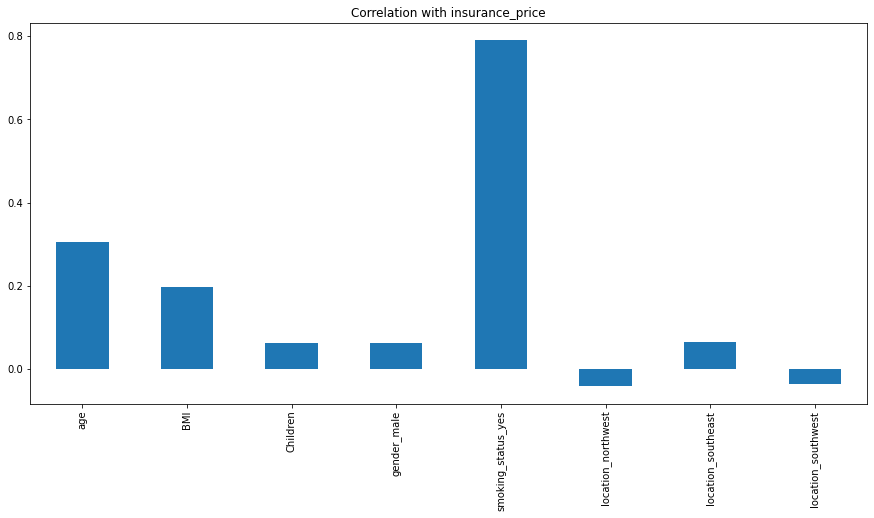

In [33]:
df2.corrwith(df1["health_insurance_price"]).plot.bar(figsize=(15,7),title="Correlation with insurance_price")

We can see the correlation between the independent variables with out come variable

* smoking status yes is highly correlated with insurance prices folwed by age variable 

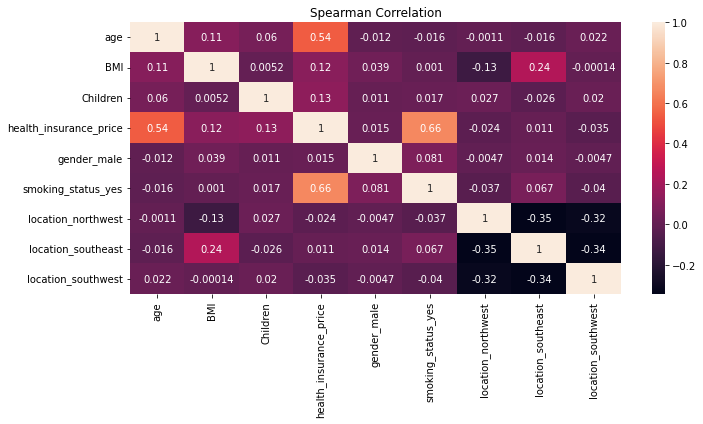

In [34]:
plt.figure(figsize=(11,5))
corr =df1.corr(method = "spearman")
sns.heatmap(corr, annot = True)
plt.title("Spearman Correlation")
plt.show()


* From the above heatmap we can obsarve that smoking_staus_yes and age were highly correlated with health_insurance_price.
* And regions such as north_west, south_east, south_west locations were very much less correlated with health_insurance_price, hence we can remove those columns

In [35]:
# dropping features which are very correlated with out come variable
X=df1.drop(columns=["health_insurance_price","location_northwest","location_southeast","location_southwest"])

* Dropped features which are very less correlated with out come variables and saperating independent and independent variables.


In [36]:
y=df1["health_insurance_price"]
# Saperated dependent variable

In [37]:
# splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

* Splitting X train Xtest and y train and y test

In [38]:
# shape of  x train and x test
X_train.shape, X_test.shape 

((1028, 5), (257, 5))

In [39]:
# shape of y train and  y test
y_train.shape, y_test.shape 

((1028,), (257,))

# Feature scaling

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.13261824, -0.15091962, -0.8991258 ,  1.0097754 , -0.51424959],
       [-0.13261824, -1.30679386,  1.61028955,  1.0097754 , -0.51424959],
       [ 1.42464766, -0.52562163, -0.8991258 , -0.99031923, -0.51424959],
       ...,
       [-1.19439045,  1.47903413, -0.8991258 , -0.99031923, -0.51424959],
       [ 0.71679952, -1.53568792, -0.06265401, -0.99031923, -0.51424959],
       [ 0.29209064, -1.74014489,  0.77381777, -0.99031923,  1.94458102]])

* scaling the features by using standard scalar Z Score, where mean =0 and median =1

In [41]:
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train
# scaled x train

,age,BMI,Children,gender_male,smoking_status_yes
0,-0.132618,-0.150920,-0.899126,1.009775,-0.514250
1,-0.132618,-1.306794,1.610290,1.009775,-0.514250
2,1.424648,-0.525622,-0.899126,-0.990319,-0.514250
3,-0.628112,-1.275840,-0.062654,-0.990319,-0.514250
4,-1.406745,-0.842489,-0.899126,1.009775,-0.514250
...,...,...,...,...,...
1023,-0.344973,0.411133,-0.062654,-0.990319,-0.514250
1024,0.646015,-1.291317,-0.899126,-0.990319,-0.514250
1025,-1.194390,1.479034,-0.899126,-0.990319,-0.514250
1026,0.716800,-1.535688,-0.062654,-0.990319,-0.514250


In [42]:
X_test=sc.transform(X_test)
X_test

array([[ 0.85836915, -1.22452234, -0.06265401,  1.0097754 ,  1.94458102],
       [-1.4775297 , -1.45748924,  0.77381777,  1.0097754 , -0.51424959],
       [ 1.42464766, -0.52562163, -0.06265401,  1.0097754 , -0.51424959],
       ...,
       [-0.84046638, -1.07952895, -0.8991258 , -0.99031923, -0.51424959],
       [ 0.50444508,  0.48851751, -0.06265401, -0.99031923, -0.51424959],
       [ 1.42464766, -0.48978057,  1.61028955, -0.99031923, -0.51424959]])

In [43]:
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test
# x test after scaling

,age,BMI,Children,gender_male,smoking_status_yes
0,0.858369,-1.224522,-0.062654,1.009775,1.944581
1,-1.477530,-1.457489,0.773818,1.009775,-0.514250
2,1.424648,-0.525622,-0.062654,1.009775,-0.514250
3,-0.982036,-0.022218,-0.899126,1.009775,-0.514250
4,-0.628112,0.272657,-0.062654,-0.990319,-0.514250
...,...,...,...,...,...
252,-0.415757,-0.532953,0.773818,1.009775,-0.514250
253,-0.486542,0.473041,-0.062654,1.009775,1.944581
254,-0.840466,-1.079529,-0.899126,-0.990319,-0.514250
255,0.504445,0.488518,-0.062654,-0.990319,-0.514250


* As we have split the train and test data set and also perfored scaling now can build models

# Model building

1) **Linear reggression Model**

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# importing linear regression model

In [45]:
# fitting linear regression to x and y train data
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred = lm.predict(X_test)
# predicting y

# Checking cost functions for Regression models

In [47]:
r2 = r2_score(y_true=y_test,y_pred=y_pred)
print("R^2 for linear regression" ,r2)

R^2 for linear regression 0.7594974442042093


* caluculating r2 for linear regression ie; 0.7594974442042093

In [48]:
lm.score(X_test,y_test)

0.7594974442042093

In [49]:
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7585572465662273


Found R^2 and Adjusted R^2 for Linear Regression is almost similar 
 
* ie; it is predicting 75% of variability in Dependent variables.

In [50]:
# Finding the mean of residuals
residuals = y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 29.060104648189395


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


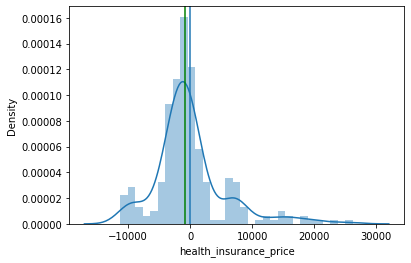

In [51]:
# finding the disrtibution of errors
sns.distplot((y_test-y_pred))
plt.axvline((y_test-y_pred).mean())
plt.axvline((y_test-y_pred).median(),color="g")

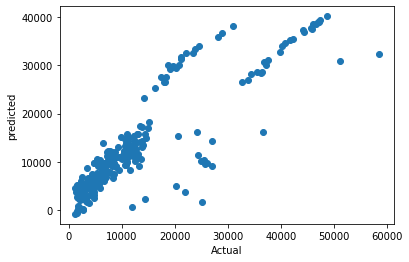

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted");

* It seems there is slight variation between the actual and predicted values

In [53]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError, ResidualsPlot
import pandas as pd

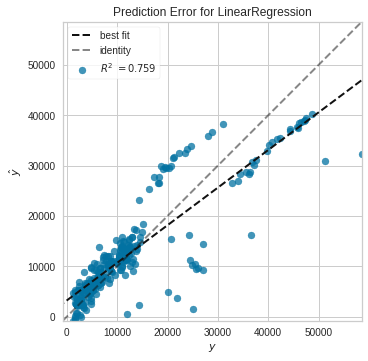

In [54]:
model1 = LinearRegression()
visualizer = PredictionError(model1)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


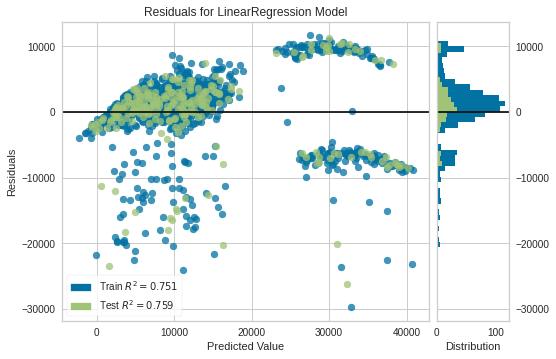

In [55]:
visualizer = ResidualsPlot(model1)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

In [56]:
# found cost functions
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3862.90883299116
MSE: 34155117.4033734
RMSE: 5844.23796601177


Found the cost functions such as MAE,MSE, RMSE

# 2) RandomForest Regressor

In [57]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestRegressor  
rf_regressor= RandomForestRegressor(n_estimators=155)  
rf_regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=155)

In [58]:
y_predc=rf_regressor.predict(X_test)
# predicted y values

In [59]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [60]:
r2=r2_score(y_test,y_predc)
print("R^2 for RandomForestRegression", r2)

R^2 for RandomForestRegression 0.8310357291020952


Found R^2 for Random Forest Regression

In [61]:
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8303751963777093


Found Adjusted R^2

In [62]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predc))
print('MSE:', metrics.mean_squared_error(y_test, y_predc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predc)))

MAE: 2726.9751431564728
MSE: 23995564.16520348
RMSE: 4898.526734152165


Found cost functions such as 

* MAE
* MSE
* RMSE 

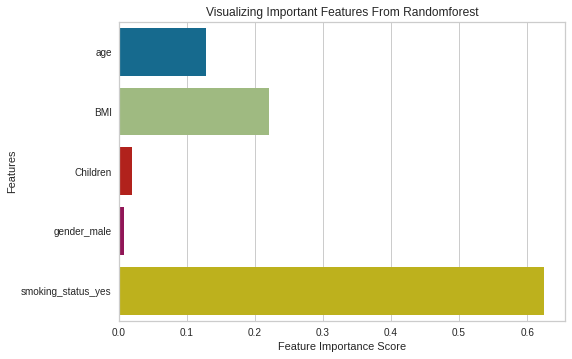

In [63]:
feature_imp1 = rf_regressor.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Randomforest")
plt.show();

* The above plot will show us the important **features** for this **model**.
so, it seems **smoking status** has more importance follwed by **BMI** and **Age**

Text(0.5, 0, 'Predicted')

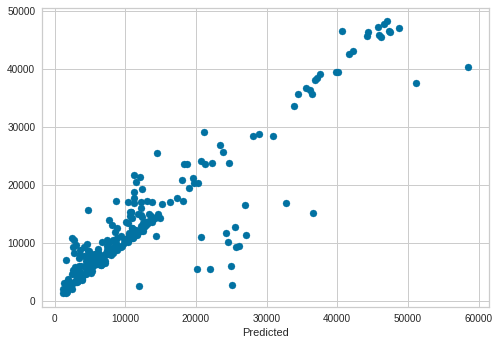

In [64]:
plt.scatter(y_test,y_predc)
plt.xlabel("Actual")
plt.xlabel("Predicted")

From the above plot though found slight variation between actual predicted values.  But it seems better than Linear regression model

1. Found R^2 and Adjusted R^2 for RandomForest Regression is almost similar 
 
* ie; it is predicting 83% of variability in Dependent variables by independent variables.


> By comparing R^2 and Adjusted R^2 for Linear regression and Random Forest Regressor it seems Random Forest is predicting better than Linear regression




# 3) XG BOOST REGRESSOR

In [65]:
from xgboost import XGBRFRegressor
regressor_xgb=XGBRFRegressor(objective="reg:linear",random_state=42)
regressor_xgb.fit(X_train,y_train)
# Training the XGBOOST with x and y train data

[01:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(random_state=42)

In [66]:
y_predic=regressor_xgb.predict(X_test)
# predicting y values

In [67]:
r2=r2_score(y_test,y_predic)
print("R^2 for XGBOOST REGRESSOR :",r2)

R^2 for XGBOOST REGRESSOR : 0.8616390292275373


In [68]:
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8610981341111477


*  R^2 and Adjusted R^2 for XGBOOST Regressor is almost same it is predicting 86% of variablity in Dependent variables by independent variables.

In [69]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predic))
print('MSE:', metrics.mean_squared_error(y_test, y_predic))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predic)))

MAE: 2633.3918618987113
MSE: 19649417.799912166
RMSE: 4432.7663822845625


*  BY comparing the R^2 and Adjusted R^2 for linear regression and RandomForestRegressor and XGBoost Regressor found XGBoost Regressor model predicted much better.

Text(0.5, 0, 'Predicted')

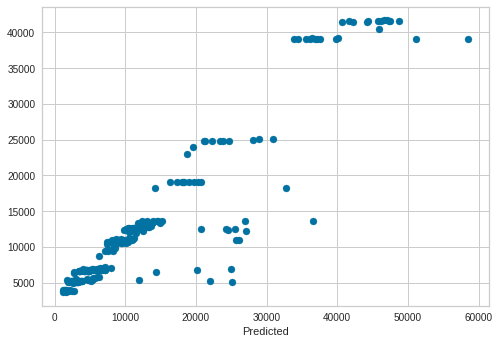

In [70]:
plt.scatter(y_test,y_predic)
plt.xlabel("Actual")
plt.xlabel("Predicted")

* seems there is slight variation between actual and predicted values

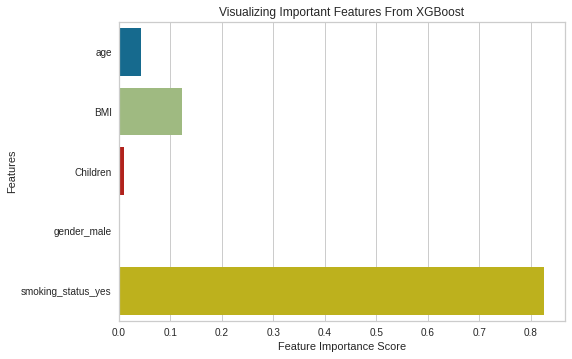

In [71]:
feature_imp2 = regressor_xgb.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From XGBoost")
plt.show();

* The above plot will show us the **important features** for **XGBoostRegressor** Model

# 4)Decision Tree Regressor

In [72]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [73]:
y_prdic=regressor.predict(X_test)


In [74]:
r2=r2_score(y_test,y_prdic)
print("R^2 is for DecisionTree Regressor:",r2)

R^2 is for DecisionTree Regressor: 0.6915584880794254


In [75]:
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 for Decision Tree Regressor : " , adj_rsquared)

Adjusted-R2 for Decision Tree Regressor :  0.6903526963987352


In [76]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_prdic))
print('MSE:', metrics.mean_squared_error(y_test, y_prdic))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prdic)))

MAE: 3126.4611712645915
MSE: 43803509.7667166
RMSE: 6618.421999745604


For Decision Tree Regressor found R^2 similar to 69% wchich is less than the above 3 Models, so it seems Decision Tree Regressor model is not performing much better compared to above 3 models.

**Cost functions for different models**
1. R^2 for linear regression is :  0.7594974442042093
2. Adjusted-R2 for linear regression is :  0.7585572465662273
3. * MAE: 3862.90883299116
 * MSE: 34155117.4033734
 * RMSE: 5844.23796601177
4. R^2 for RandomForestRegression is : 0.8307898815719761
5. Adjusted-R2 :  0.830128387754822
6. * MAE: 2745.18178198028
 * MSE: 24030478.352401044
 * RMSE: 4902.08918242019
7. R^2 for XGBOOST REGRESSOR : 0.8624360528891857
8. Adjusted-R2 :  0.8618982735806993
9. * MAE: 2614.94917599313
 * MSE: 19536227.99763837
 * RMSE: 4419.980542676446
10. R^2 for DecisionTree Regressoer is :0.6915584880794254
11. Adjusted-R2 for Decision Tree Regressor :  0.6903526963987352
12. * MAE: 3126.4611712645915
 * MSE: 43803509.7667166
 * RMSE: 6618.421999745604

*  From the above 4 models, We can found that the R^2 and Adjusted R^2 is maximum for **XGBoostRegressor** moel, ie; this Model is **predicting** **high varibility** in Dependent variable by the independent variables **ie; 86%**
*  And also found the Mean Squared Error [MSE] and Root Mean Squared Error [RMSE] minimum ie; minimum error by XGBoostRegressor Model.

* so we can use XGBOOST Regressor model for insurance price predictions